# Explore here

In [23]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import json
from sklearn.model_selection import train_test_split

In [24]:
data = pd.read_csv("../data/raw/diabetes.csv", sep = ",")
pd.set_option('display.max_columns', None)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
print(data.columns.tolist)

<bound method IndexOpsMixin.tolist of Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')>


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [27]:
columns_with_nan = data.columns[data.isna().any()].tolist()
print(f"Hay {len(columns_with_nan)} columnas con valores nulos")

### Valorar ###
# if len(columns_with_nan) > 0:
#     data.fillna(data.mean())

Hay 0 columnas con valores nulos


In [28]:
target = ["Outcome"]
categoric_var = [c for c in list(data.dtypes[data.dtypes == "object"].index)]
numeric_var = [c for c in list(data.dtypes[data.dtypes != "object"].index)]

In [29]:
data.shape

(768, 9)

In [30]:
data[target].value_counts()

Outcome
0          500
1          268
Name: count, dtype: int64

In [31]:
duplicados = data[data.duplicated()]
data = data.drop_duplicates().reset_index(drop = True)
 
print(f"Medidas del dataset despues de duplicar filas iguales: {data.shape}")
print("Fila duplicada:")
print(duplicados)

Medidas del dataset despues de duplicar filas iguales: (768, 9)
Fila duplicada:
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


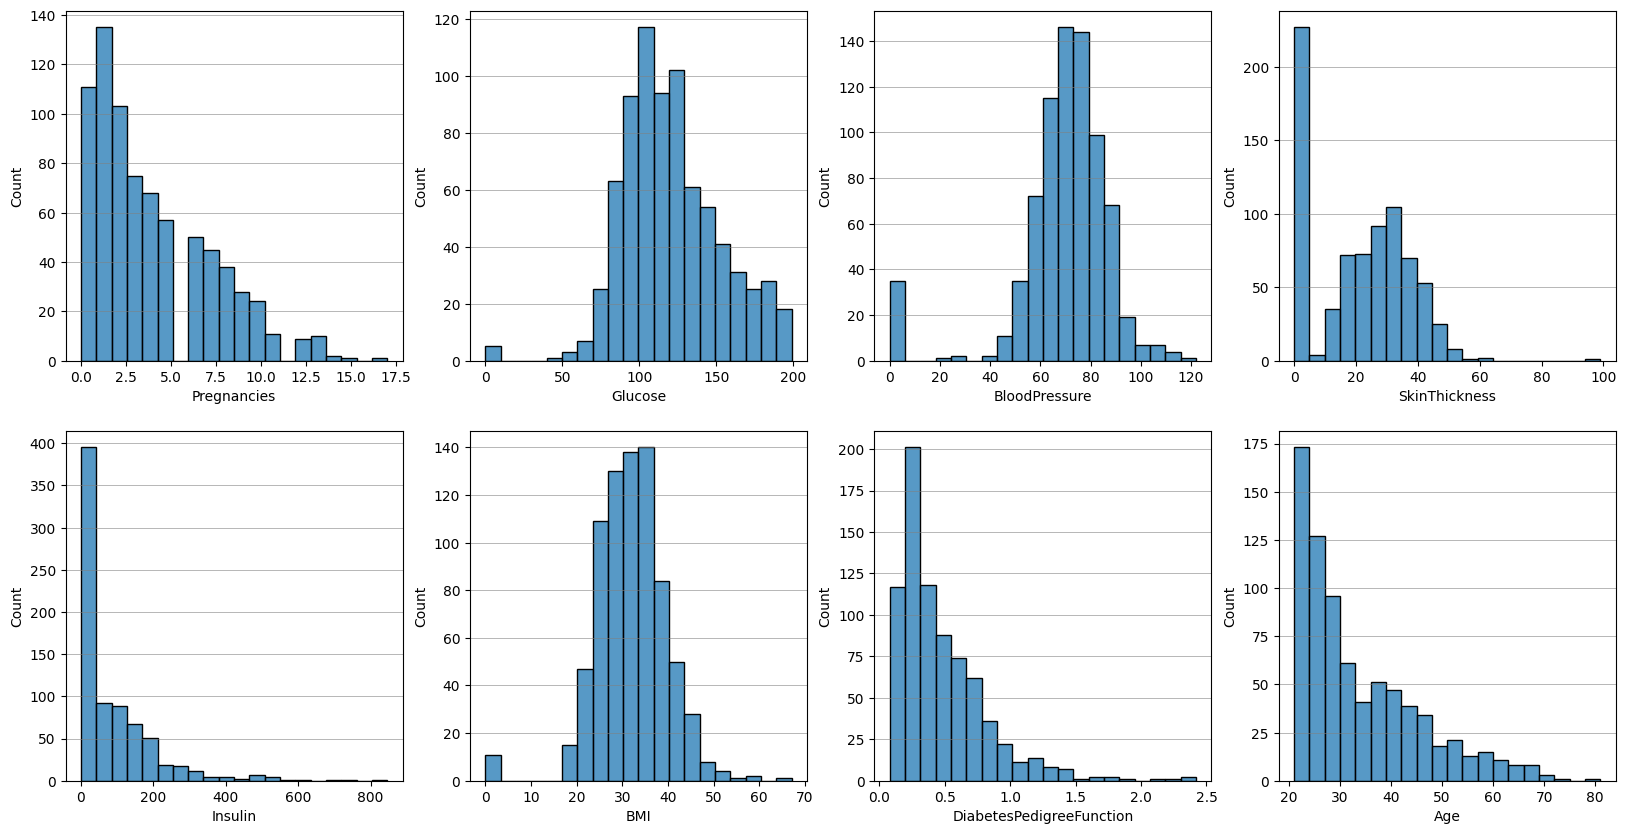

In [32]:
def graficar_distribucion_numerica(df, columns):
    
    n = len(columns)
    n_columns = 4  
    n_rows = (n // n_columns) + (n % n_columns > 0)  
    
    fig, axes = plt.subplots(n_rows, n_columns, figsize=(n_columns * 5, n_rows * 5))
    
    axes = axes.flatten()
    
    for i, col in enumerate(columns):
        sns.histplot(df[col], bins=20, ax=axes[i])
        axes[i].yaxis.grid(True, color='gray', linewidth=0.4, zorder=0)
    
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')  
    
        plt.tight_layout()
    plt.show()

graficar_distribucion_numerica(data, numeric_var[:-1]) # Indice -1 porque la target esta al final. 

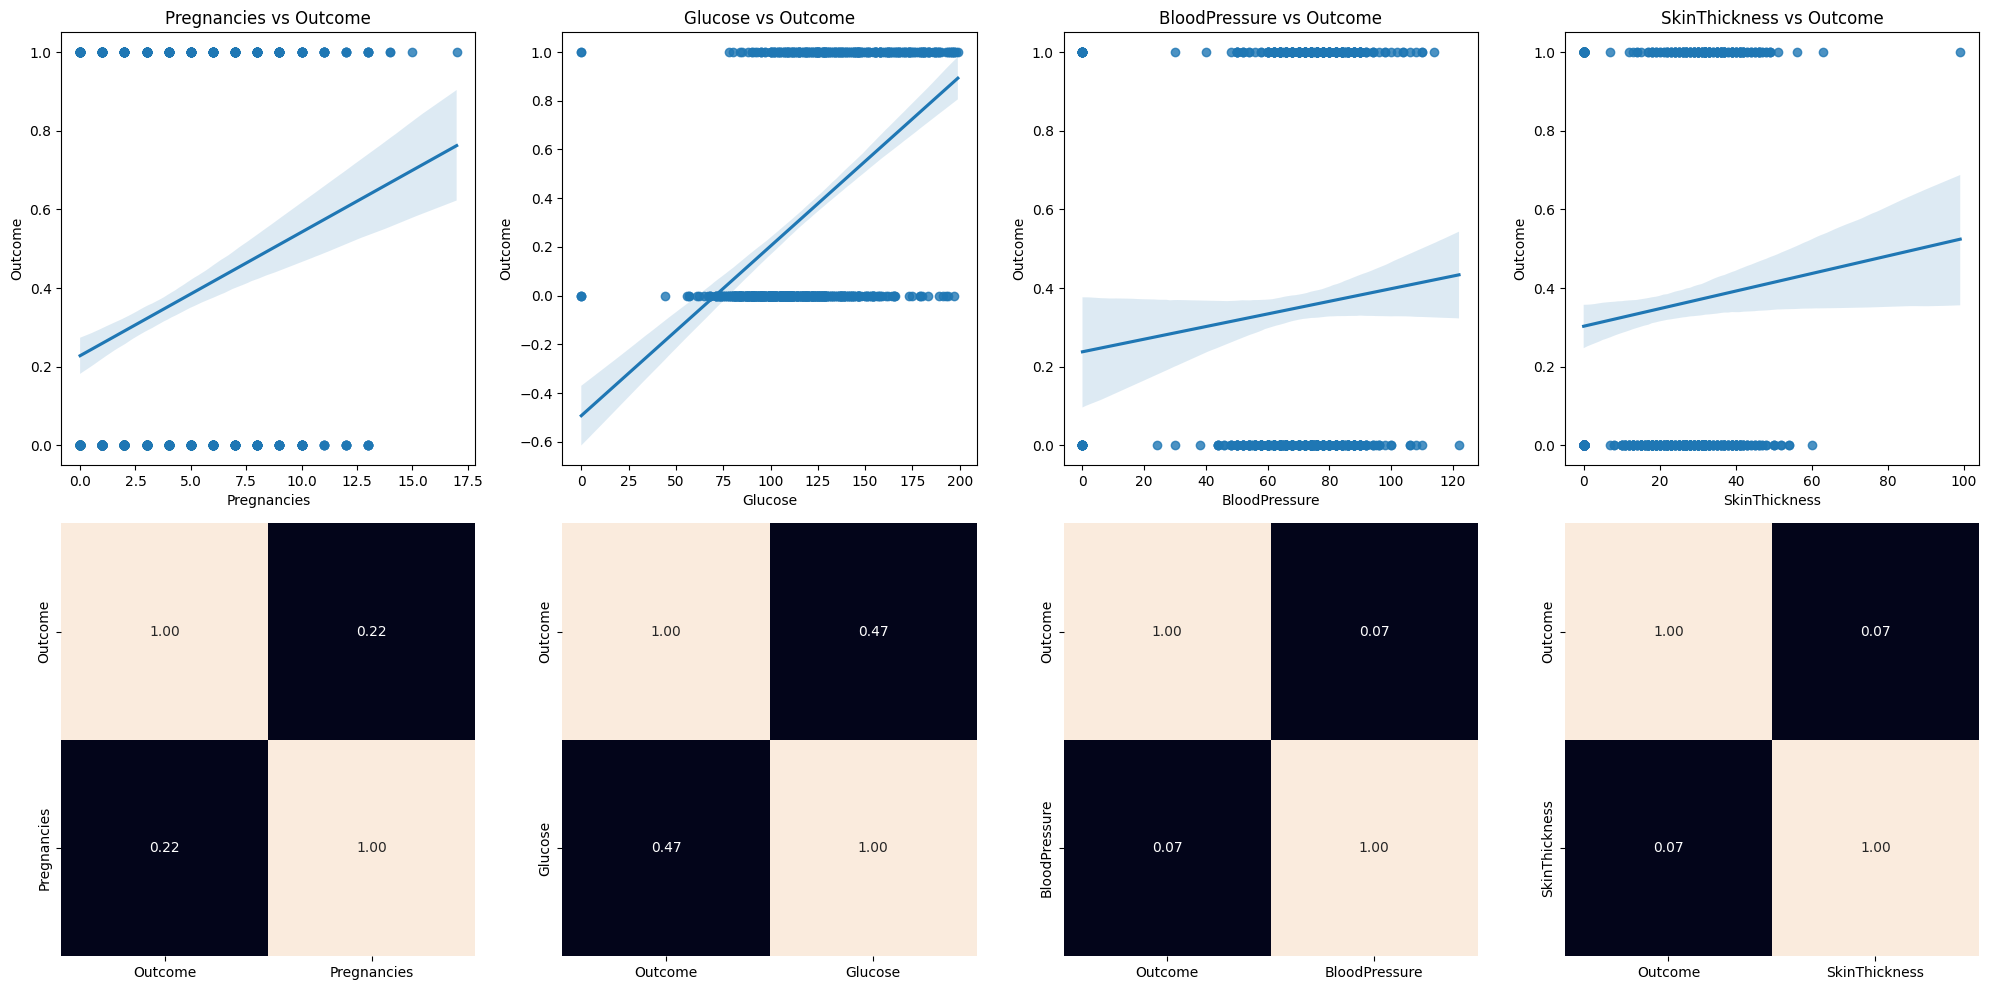

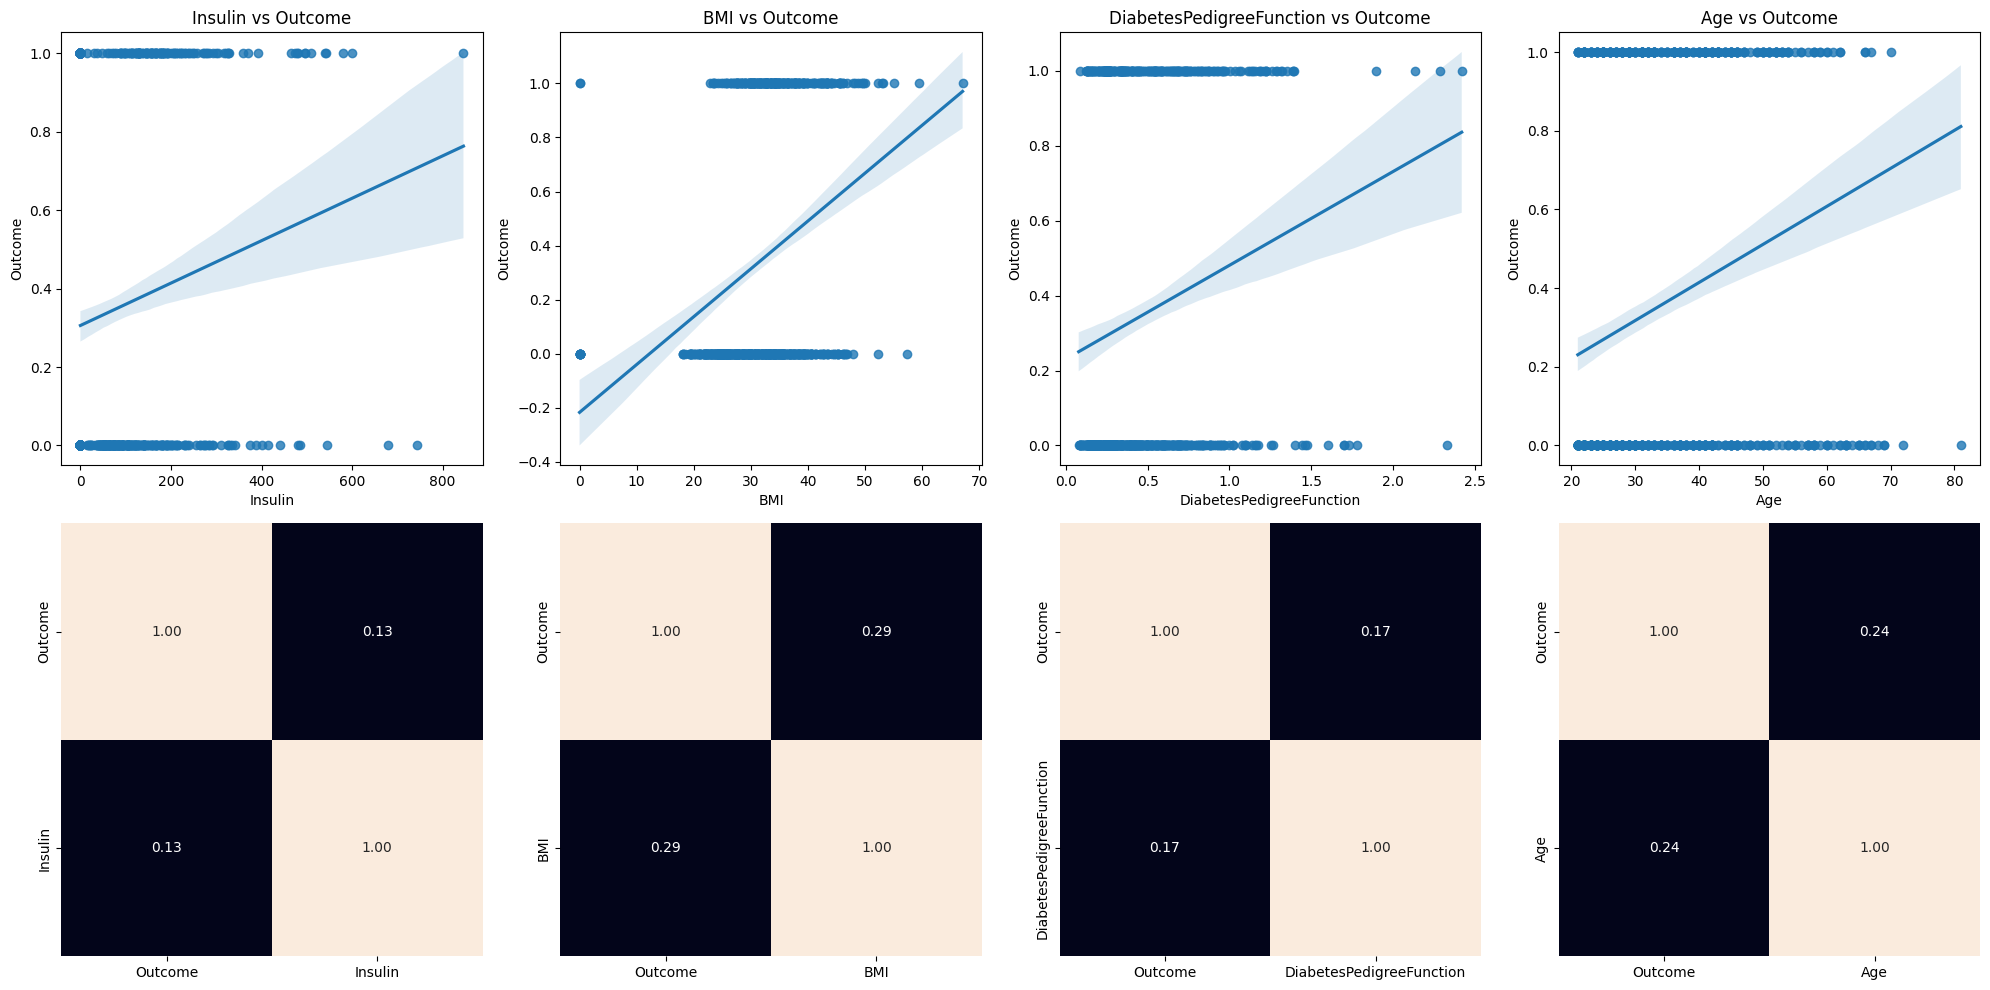

In [33]:
def graficar_dispersiones_y_heatmaps(df, columnas, target_col):
    n = len(columnas)  
    n_columnas = 4 
    n_filas = 2
    
    fig, axis = plt.subplots(n_filas, n_columnas, figsize=(20, 10))
    
    # Aplanar el arreglo de ejes para que sea más fácil acceder a él
    axis = axis.flatten()
    
    # Iterar a través de las columnas para crear los gráficos
    for i, col in enumerate(columnas):
        if i < len(axis):  # Asegurarse de no exceder el número de subgráficas
            sns.regplot(ax=axis[i], data=df, x=col, y=target_col)
            axis[i].set_title(f'{col} vs {target_col}')
        
            # Aquí ajustamos para evitar un índice fuera de rango
            if i + n_columnas < len(axis):
                sns.heatmap(df[[target_col, col]].corr(), annot=True, fmt=".2f", ax=axis[i + n_columnas], cbar=False)
                axis[i + n_columnas].set_title('')
    
    plt.tight_layout()
    plt.show()

graficar_dispersiones_y_heatmaps(data, numeric_var[0:4], "Outcome")
graficar_dispersiones_y_heatmaps(data, numeric_var[4:8], "Outcome")


In [34]:
# No es necesario porque no hay variables categoricas.

# def automatizar_factorizacion(df, columnas):
#     transformacion_reglas = {}
#     col_factorizadas = []
    
#     # Iterar sobre las columnas especificadas para la factorización
#     for col in columnas:
#         # Aplicar la factorización y reemplazar la columna original con la columna factorizada
#         df[f"{col}_n"] = pd.factorize(df[col])[0]
        
#         # Guardar las reglas de transformación para la columna actual en el diccionario
#         transformacion_reglas[col] = {row[col]: row[f"{col}_n"] for _, row in df[[col, f"{col}_n"]].drop_duplicates().iterrows()}
        
#         # Reemplazar la columna original por la columna factorizada
#         df[col] = df[f"{col}_n"]
        
#         # Agregar el nombre de la columna factorizada a la lista
#         col_factorizadas.append(col)  # Ya no agregamos `f"{col}_n"` ya que reemplazamos la columna original

#         # Eliminar la columna auxiliar que contiene los números factorized (ya que la hemos reemplazado)
#         df.drop(columns=[f"{col}_n"], inplace=True)
    
#     # Guardar el diccionario de reglas en un archivo JSON
#     with open("../models/transformacion_reglas_categoricas.json", "w") as f:
#         json.dump(transformacion_reglas, f)
    
#     print("Factorización completada y reglas guardadas en 'transformacion_reglas_categoricas.json'.")
    
#     # Retornar el DataFrame actualizado con las columnas reemplazadas y la lista de columnas factorizadas
#     return df, col_factorizadas

# # Llamar a la función para automatizar la factorización
# data, col_factorizadas = automatizar_factorizacion(data, categoric_var)

# # Imprimir las columnas que han sido factorizadas
# print("Columnas factorizadas:", col_factorizadas)

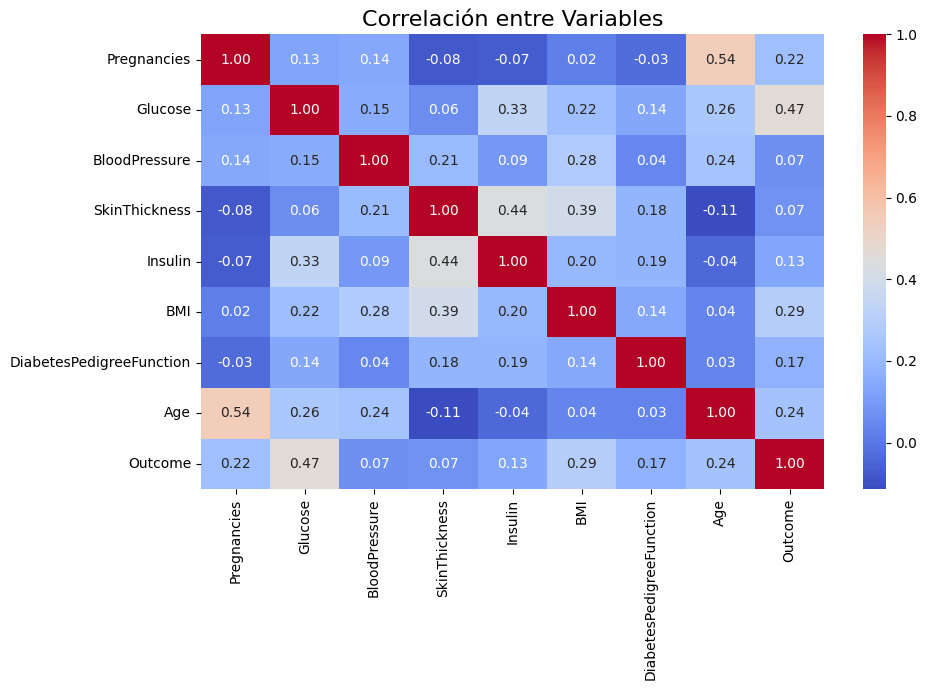

In [35]:
# ANÁLISIS CORRELACIONES 

fig, axis = plt.subplots(figsize = (10, 7))

sns.heatmap(data[categoric_var + numeric_var].corr(), annot = True, fmt = ".2f", cmap = "coolwarm")
axis.set_title("Correlación entre Variables", fontsize=16)

plt.tight_layout()

plt.show()

OUTLAIER ANALYSIS 

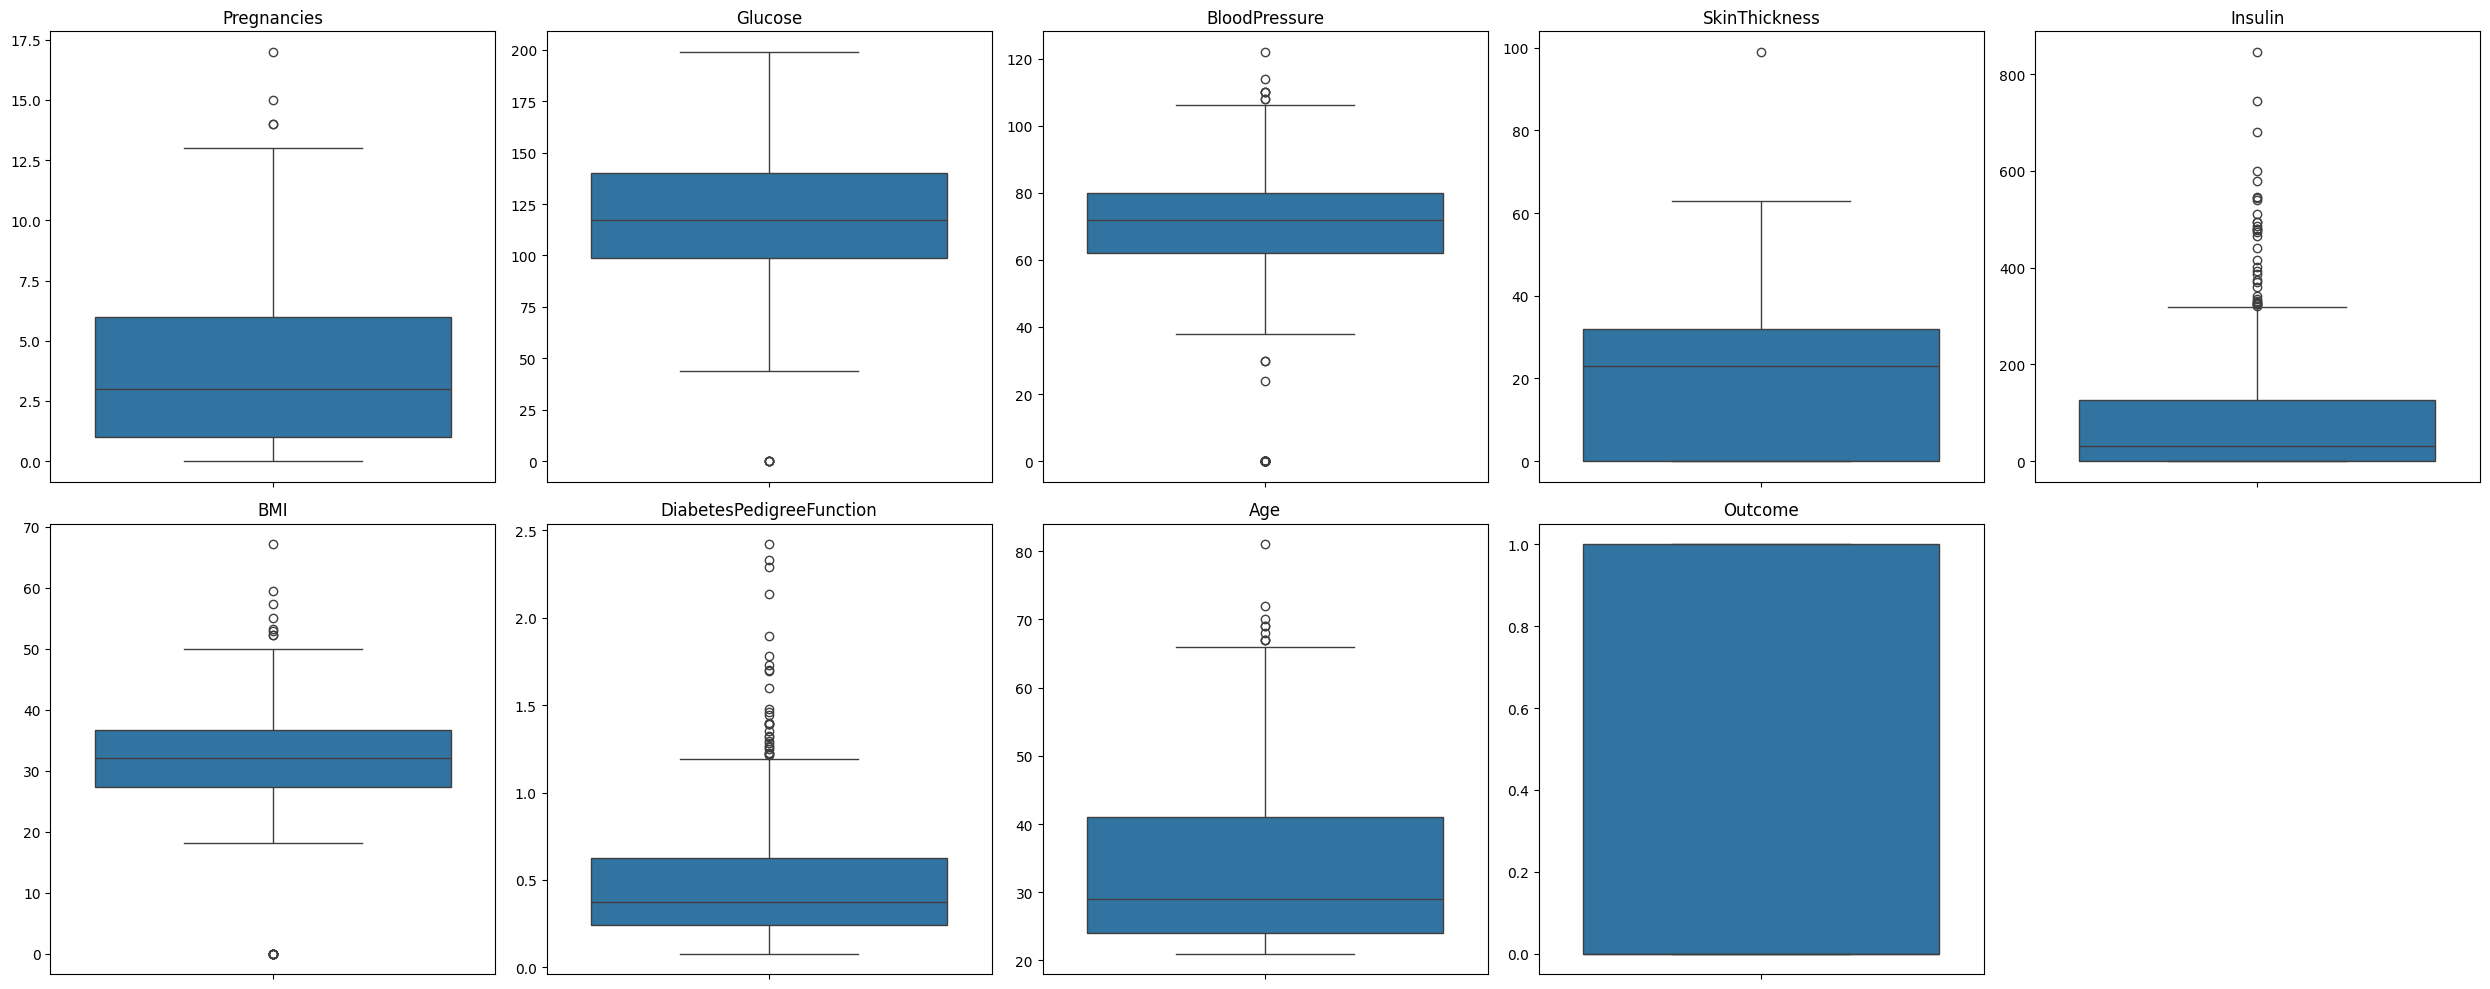

In [36]:
def generar_boxplots_automaticos(df):
   
    # Filtrar las columnas numéricas del DataFrame, como ya esta normalizado, son todas. 
    columnas = df.columns

    n_columnas = 5
    n_filas = (len(columnas) + n_columnas - 1) // n_columnas  # Redondeo hacia arriba

    # Crear la figura y los ejes para los subgráficos
    fig, axis = plt.subplots(n_filas, n_columnas, figsize=(n_columnas * 5, n_filas * 5))

    # Aplanar el array de ejes para facilitar la iteración
    axis = axis.flatten()

    # Graficar un boxplot para cada columna del DataFrame
    for i, col in enumerate(columnas):
        sns.boxplot(ax=axis[i], data=df, y=col)
        axis[i].set_title(col)
        axis[i].set_ylabel('')

    # Si hay menos gráficos que subgráficos, ocultar los ejes restantes
    for j in range(i + 1, len(axis)):
        axis[j].axis('off')

    # Ajustar el layout para evitar que los gráficos se sobrepongan
    plt.tight_layout()
    plt.show()

generar_boxplots_automaticos(data)

OUTLIER DETECTION

In [37]:
# Columnas con outlaiers 

columns_with_outliers = []

# Iterar sobre las columnas numéricas del DataFrame
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    # Calcular los cuartiles y el IQR para cada columna
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calcular los límites inferiores y superiores para detectar outliers
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Detectar los outliers (valores fuera de los límites)
    outliers = data[(data[column] < lower_limit) | (data[column] > upper_limit)]
    
    # Si hay outliers, agregar el nombre de la columna a la lista
    if not outliers.empty:
        columns_with_outliers.append(column)

# Mostrar las columnas que contienen outliers
print("Columnas con outliers:", columns_with_outliers)

Columnas con outliers: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


OUTLAIER REPLACEMENT

In [38]:
data_sin_outliers = data.copy()

col_con_outliers = columns_with_outliers

def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = min(df[column])
  # Remove upper outliers
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  # Remove lower outliers
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return df.copy(), [lower_limit, upper_limit]

outliers_dict = {}
for column in col_con_outliers:
  data_sin_outliers, limits_list = replace_outliers_from_column(column, data_sin_outliers)
  outliers_dict[column] = limits_list

with open("../models/outliers_replacement.json", "w") as f:
  json.dump(outliers_dict, f)

outliers_dict

{'Pregnancies': [0, np.float64(13.5)],
 'Glucose': [np.float64(37.125), np.float64(202.125)],
 'BloodPressure': [np.float64(35.0), np.float64(107.0)],
 'SkinThickness': [0, np.float64(80.0)],
 'Insulin': [0, np.float64(318.125)],
 'BMI': [np.float64(13.35), np.float64(50.550000000000004)],
 'DiabetesPedigreeFunction': [0.078, np.float64(1.2)],
 'Age': [21, np.float64(66.5)]}

In [39]:
### ANÁLISIS VALORES MISSING 

print(data.info())
print("")
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [40]:
### INFERENCIA NUEVAS CARACTERISTICAS ?? 

In [41]:
# Función para categorizar el BMI y devolver números en lugar de strings
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 1  # Bajo peso
    elif 18.5 <= bmi < 24.9:
        return 2  # Normal
    elif 25 <= bmi < 29.9:
        return 3  # Sobrepeso
    else:
        return 4  # Obesidad

# Sobrescribir la columna 'BMI' con los valores categorizados
data['BMI'] = data['BMI'].apply(categorize_bmi)

# Crear un diccionario de la transformación
bmi_category_dict = {
    "Bajo peso": 1,
    "Normal":  2,
    "Sobrepeso":3,
    "Obesidad": 4
}

# Guardar el diccionario en un archivo JSON
with open('../models/bmi_categories.json', 'w') as json_file:
    json.dump(bmi_category_dict, json_file, indent=4)

In [42]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,4,0.627,50,1
1,1,85,66,29,0,3,0.351,31,0
2,8,183,64,0,0,2,0.672,32,1
3,1,89,66,23,94,3,0.167,21,0
4,0,137,40,35,168,4,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,4,0.171,63,0
764,2,122,70,27,0,4,0.340,27,0
765,5,121,72,23,112,3,0.245,30,0
766,1,126,60,0,0,4,0.349,47,1


SPLIT

In [43]:
# Separar características (X) y la variable objetivo (target)
X = data.drop(target, axis=1)  # Aquí 'target' es el nombre de la columna objetivo
y = data[target]

# Dividir el conjunto de datos en entrenamiento (80%) y prueba (20%)
num_variables = data.copy().drop(target, axis= 1).columns.tolist()

# Dividimos el conjunto de datos en muestras de train y test
X_con_outliers = data.drop(target, axis = 1)[num_variables]
X_sin_outliers = data_sin_outliers.drop(target, axis = 1)[num_variables]
y = data[target]

X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_con_outliers, y, test_size = 0.2, random_state = 42)
X_train_sin_outliers, X_test_sin_outliers, = train_test_split(X_sin_outliers, test_size = 0.2, random_state = 42)

# GUARDAR LOS DATASETS
X_train_con_outliers.to_csv("../data/processed/X_train_con_outliers.csv", index = False)
X_train_sin_outliers.to_csv("../data/processed/X_train_sin_outliers.csv", index = False)
X_test_con_outliers.to_csv("../data/processed/X_test_con_outliers.csv", index = False)
X_test_sin_outliers.to_csv("../data/processed/X_test_sin_outliers.csv", index = False)
y_train.to_csv("../data/processed/y_train.csv", index = False)
y_test.to_csv("../data/processed/y_test.csv", index = False)